#Setting up Conda and Hugging face for dataset

In [ ]:
# !conda install pandas pyarrow

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
# !conda install -c huggingface -c conda-forge datasets
# !conda install -c conda-forge fsspec
# !pip install hf_transfer

^C


In [ ]:
!pip install huggingface_hub

In [3]:
!huggingface-cli login

^C


# Downloading Dataset

In [4]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/sdiaeyu6n/tu-berlin/" + splits["train"])

In [5]:
df.head()

,image,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,73
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,46
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,111
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,95
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,74


In [13]:
!pip install datasets

# Importing the Datset

In [18]:
from datasets import load_dataset

dataset = load_dataset("sdiaeyu6n/tu-berlin", split="train")

print(dataset.features)
print(dataset.shape)



{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with ste

# Mapping the Labels

In [19]:
label_names = dataset.features['label'].names

print(f"Number of classes: {len(label_names)}")
print(f"First few class names: {label_names[:5]}")

label_map = {i: name for i, name in enumerate(label_names)}

df['class_name'] = df['label'].map(label_map)

print(df[['label', 'class_name']].head())

Number of classes: 250
First few class names: ['airplane', 'alarm clock', 'angel', 'ant', 'apple']
   label      class_name
0     73             ear
1     46          carrot
2    111  human-skeleton
3     95          guitar
4     74        elephant


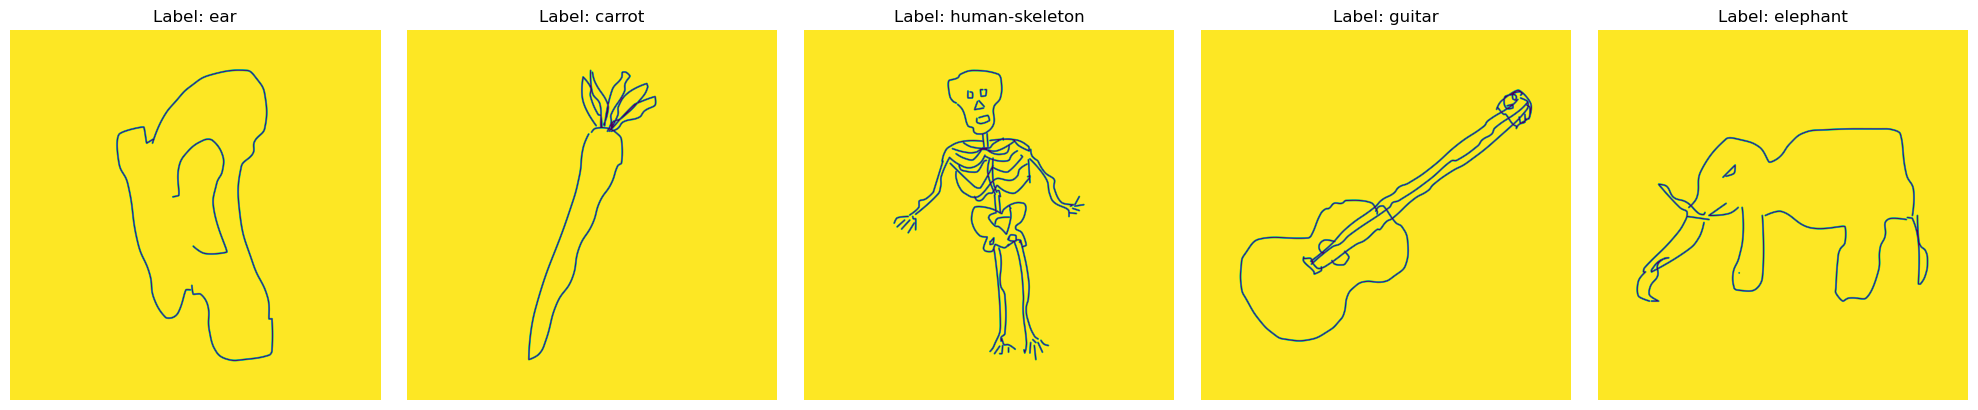

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_image(image, label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    sample = dataset[i]
    image = sample['image']
    label = label_map[sample['label']]
    plt.subplot(1, 5, i+1)
    display_image(image, label)

plt.tight_layout()
plt.show()


In [27]:
df.head()

,image,label,class_name
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,73,ear
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,46,carrot
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,111,human-skeleton
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,95,guitar
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,74,elephant


In [29]:
import numpy as np

# Check the contents of train_images.npz and train_labels.npz
images_path = "SketchClassifier/data/processed/train_images.npz"
labels_path = "SketchClassifier/data/processed/train_labels.npz"

with np.load(images_path) as images_data, np.load(labels_path) as labels_data:
    print("Images shape:", images_data['images'].shape)
    print("Labels shape:", labels_data['labels'].shape)


Images shape: (16000, 224, 224, 3)
Labels shape: (0,)
